# AUTOINLAND INSURANCE CLAIM CHALLENGE


## FEATURE ENGINEERING AND EXTACTION

In [364]:
import pandas as pd
import numpy as np
import sklearn
import imblearn

##### **FETCHING DATA**

In [365]:
data = pd.read_csv('Train.csv')

In [366]:
data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [368]:

data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


##### **HANDLING MISSING VALUES**

In [369]:
data['Gender'].fillna(method = 'ffill', inplace = True)
data['Car_Category'].fillna(method = 'bfill', inplace = True)
data['Subject_Car_Colour'].fillna(method = 'ffill', inplace = True)
data['Subject_Car_Make'].fillna(method = 'bfill', inplace = True)
data['LGA_Name'].fillna(method = 'bfill', inplace = True)
data['State'].fillna(method = 'bfill', inplace = True)
data['LGA_Name'].fillna(method = 'bfill', inplace = True)

In [370]:
data.isna().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
dtype: int64

In [371]:
data.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Lagos,Lagos,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Lagos,Lagos,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Red,TOYOTA,Lagos,Lagos,Muuve,1


##### **FEATURE EXTRACTION**

In [372]:
#Convert to datetime to extract more info
data['Policy Start Date'] = pd.to_datetime(data['Policy Start Date'])
data['Policy End Date'] = pd.to_datetime(data['Policy End Date'])
data['First Transaction Date'] = pd.to_datetime(data['First Transaction Date'])


#Age binning
bin_ranges = [0, 15, 30, 45, 60, 75, 100,150]
bin_names = [1, 2, 3, 4, 5, 6,7]
data['Age_bin'] = (pd.cut(np.array(np.abs(data['Age'])), bins=bin_ranges, labels=bin_names)).map(str)
data['Age_bin'].fillna(method = 'bfill', inplace = True)
data['Age_bin'] = data['Age_bin'].map(str)

#Days Covered by Policy
data['No_Days_Policy'] = ((data['Policy End Date'] - data['Policy Start Date']).dt.days).map(str)

#map the column to string
data['No_Pol'] = data['No_Pol'].map(int)



data.head()
#data.isna().sum()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Age_bin,No_Days_Policy
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,Lagos,Lagos,Car Classic,0,2,364
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,Lagos,Lagos,Car Classic,1,6,364
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,Car Classic,0,3,364
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,Saloon,Red,TOYOTA,Lagos,Lagos,CarSafe,0,1,364
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,Saloon,Red,TOYOTA,Lagos,Lagos,Muuve,1,2,124


In [373]:
state_dict = dict(data['State'].value_counts())
k_less = list()
for key,val in state_dict.items():
    if val < 200:
        k_less.append(key)

for i in range(len(data)):

    if data.loc[i, 'State'] in k_less:
        data.loc[i, 'State_ext'] = 'Other'
    else:
        data.loc[i, 'State_ext'] = data.loc[i, 'State']





In [374]:
col = dict(data['Subject_Car_Colour'].value_counts())
k = list()
for key,val in col.items():
    if val < 1000:
        k.append(key)

for i in range(len(data)):

    if data.loc[i, 'Subject_Car_Colour'] in k:
        data.loc[i, 'Car_Colour_ext'] = 'Other'
    else:
        data.loc[i, 'Car_Colour_ext'] = data.loc[i, 'Subject_Car_Colour']


In [375]:
make = dict(data['Subject_Car_Make'].value_counts())
k = list()
for key,val in make.items():
    if val < 500:
        k.append(key)

for i in range(len(data)):

    if data.loc[i, 'Subject_Car_Make'] in k:
        data.loc[i, 'Car_Make_ext'] = 'Other'
    else:
        data.loc[i, 'Car_Make_ext'] = data.loc[i, 'Subject_Car_Make']


In [376]:
gen = dict(data['Gender'].value_counts())
k = list()
for key,val in gen.items():
    if val < 1000:
        k.append(key)

for i in range(len(data)):

    if data.loc[i, 'Gender'] in k:
        data.loc[i, 'Gender_ext'] = 'Other'
    else:
        data.loc[i, 'Gender_ext'] = data.loc[i, 'Gender']


In [377]:
cc = dict(data['Car_Category'].value_counts())
ky = list()
for key,val in cc.items():
    if val < 100:
        ky.append(key)

for i in range(len(data)):

    if data.loc[i, 'Car_Category'] in ky:
        data.loc[i, 'Car_Category_ext'] = 'Other'
    else:
        data.loc[i, 'Car_Category_ext'] = data.loc[i, 'Car_Category']


In [378]:
pn = dict(data['ProductName'].value_counts())
kn = list()
for key,val in pn.items():
    if val < 470:
        kn.append(key)

for i in range(len(data)):

    if data.loc[i, 'ProductName'] in kn:
        data.loc[i, 'ProductName_ext'] = 'Other'
    else:
        data.loc[i, 'ProductName_ext'] = data.loc[i, 'ProductName']


In [379]:
data.tail()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,ProductName,target,Age_bin,No_Days_Policy,State_ext,Car_Colour_ext,Car_Make_ext,Gender_ext,Car_Category_ext,ProductName_ext
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,JEEP,Black,Range Rover,...,Car Classic,1,2,364,Ibeju-Lekki,Black,Other,Female,JEEP,Car Classic
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,JEEP,Black,TOYOTA,...,Car Classic,0,4,364,Lagos,Black,TOYOTA,Female,JEEP,Car Classic
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,JEEP,Black,TOYOTA,...,CarSafe,0,3,363,Lagos,Black,TOYOTA,Male,JEEP,CarSafe
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,Male,120,2010-02-27,2,JEEP,White,TOYOTA,...,CVTP,0,7,364,Lagos,Other,TOYOTA,Male,JEEP,Other
12078,ID_ZZWRIIE,2010-07-01,2011-06-30,Female,46,2010-07-01,2,JEEP,Black,Land Rover,...,Car Classic,0,4,364,Lagos,Black,Other,Female,JEEP,Car Classic


In [380]:
"""
Dropping some unique columns
-target that will be used for prediction
-Age,ID
-First Transaction Date: It is the same as the Policy Start Date
-LGA_Name since it is contained in State

"""
target = data['target']
features = data.drop(['target', 'Age', 'ID', 'First Transaction Date','Policy Start Date','ProductName','Subject_Car_Make','Car_Category','Gender','Subject_Car_Colour', 'Policy End Date', 'LGA_Name','State'], axis = 1)
features.head(20)



,No_Pol,Age_bin,No_Days_Policy,State_ext,Car_Colour_ext,Car_Make_ext,Gender_ext,Car_Category_ext,ProductName_ext
0,1,2,364,Lagos,Black,TOYOTA,Male,Saloon,Car Classic
1,1,6,364,Lagos,Grey,TOYOTA,Female,JEEP,Car Classic
2,1,3,364,Lagos,Other,TOYOTA,Male,Saloon,Car Classic
3,1,1,364,Lagos,Other,TOYOTA,Male,Saloon,CarSafe
4,3,2,124,Lagos,Other,TOYOTA,Other,Saloon,Other
5,2,3,364,Lagos,Other,TOYOTA,Male,Saloon,Car Classic
6,3,3,364,Lagos,Other,TOYOTA,Female,Saloon,Other
7,1,3,364,Benue,Other,TOYOTA,Male,Saloon,CarSafe
8,2,5,364,Benue,Black,Other,Female,JEEP,Car Classic
9,1,4,364,Eti-Osa,Black,Lexus,Female,JEEP,Car Classic


In [381]:
# Converting categorical features to numerical features
cat = ['Gender_ext', 'Car_Category_ext', 'Car_Colour_ext','Age_bin','No_Pol','Car_Make_ext','State_ext', 'ProductName_ext']

# One Hot Encoding conversion
feature = pd.get_dummies(features, prefix_sep= "_", columns = cat)

feature.shape

(12079, 46)

In [382]:
feature.columns

Index(['No_Days_Policy', 'Gender_ext_Female', 'Gender_ext_Male',
       'Gender_ext_Other', 'Car_Category_ext_JEEP', 'Car_Category_ext_Other',
       'Car_Category_ext_Saloon', 'Car_Category_ext_Truck',
       'Car_Colour_ext_As Attached', 'Car_Colour_ext_Black',
       'Car_Colour_ext_Grey', 'Car_Colour_ext_Other', 'Car_Colour_ext_Silver',
       'Age_bin_1', 'Age_bin_2', 'Age_bin_3', 'Age_bin_4', 'Age_bin_5',
       'Age_bin_6', 'Age_bin_7', 'No_Pol_1', 'No_Pol_2', 'No_Pol_3',
       'No_Pol_4', 'No_Pol_5', 'No_Pol_6', 'No_Pol_7', 'No_Pol_10',
       'Car_Make_ext_Honda', 'Car_Make_ext_Hyundai', 'Car_Make_ext_Lexus',
       'Car_Make_ext_Mercedes', 'Car_Make_ext_Other', 'Car_Make_ext_TOYOTA',
       'State_ext_Abuja-Municipal', 'State_ext_Benue', 'State_ext_Eti-Osa',
       'State_ext_Ibeju-Lekki', 'State_ext_Lagos', 'State_ext_Ogun',
       'State_ext_Other', 'ProductName_ext_Car Classic',
       'ProductName_ext_Car Plus', 'ProductName_ext_CarSafe',
       'ProductName_ext_Customiz

##### __FEATURE SCALING__

In [383]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
feature['No_Days_Policy'] = scaler.fit_transform(feature['No_Days_Policy'].values.reshape(-1,1))

In [384]:
feature

,No_Days_Policy,Gender_ext_Female,Gender_ext_Male,Gender_ext_Other,Car_Category_ext_JEEP,Car_Category_ext_Other,Car_Category_ext_Saloon,Car_Category_ext_Truck,Car_Colour_ext_As Attached,Car_Colour_ext_Black,...,State_ext_Eti-Osa,State_ext_Ibeju-Lekki,State_ext_Lagos,State_ext_Ogun,State_ext_Other,ProductName_ext_Car Classic,ProductName_ext_Car Plus,ProductName_ext_CarSafe,ProductName_ext_Customized Motor,ProductName_ext_Other
0,0.031635,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0.031635,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0.031635,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.031635,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.010066,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,0.031635,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
12075,0.031635,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
12076,0.031545,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
12077,0.031635,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


##### **MODELLING WITH ALL FEATURES**

In [385]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
f_train,f_test,t_train,t_test = train_test_split(feature,target,test_size=.2,random_state=0)


ros = SMOTE(random_state=0)
rf_sampled, rt_sampled = ros.fit_resample(f_train,t_train)




In [386]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, random_state=0)
rfc.fit(rf_sampled,rt_sampled)

RandomForestClassifier(n_estimators=500, random_state=0)

In [387]:
t_pred = rfc.predict(f_test)

In [388]:
from sklearn.metrics import accuracy_score, f1_score

f1 = f1_score(t_test,t_pred)
acc = accuracy_score(t_test,t_pred)

print(f'F1_Score: {f1}')
print(f'Accuracy_Score: {acc}')

F1_Score: 0.2931034482758621
Accuracy_Score: 0.7963576158940397


In [389]:
import joblib
#saving a model

filename = 'rfc_model.pkl'
joblib.dump(rfc, filename)

['rfc_model.pkl']

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


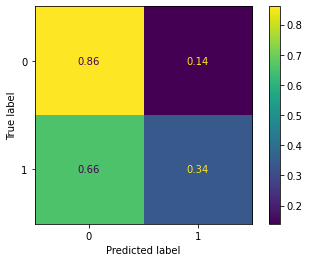

In [390]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,f_test,t_test,normalize='true')
plt.show()

In [398]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier(learning_rate=0.001, scoring='f1', random_state=0)
hgbc.fit(rf_sampled,rt_sampled)

HistGradientBoostingClassifier(learning_rate=0.001, random_state=0,
                               scoring='f1')

In [402]:
#saving a model

filename = 'hgbc_model.pkl'
joblib.dump(hgbc, filename)

['hgbc_model.pkl']

In [400]:
hgbc_pred = hgbc.predict(f_test)

In [401]:
hgbc_acc = accuracy_score(t_test,hgbc_pred)
hgbc_f1 = f1_score(t_test,hgbc_pred)
print(f'F1 score: {hgbc_f1}')
print(f'Accuracy_score: {hgbc_acc}')

F1 score: 0.34193998604326586
Accuracy_score: 0.6096854304635762


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


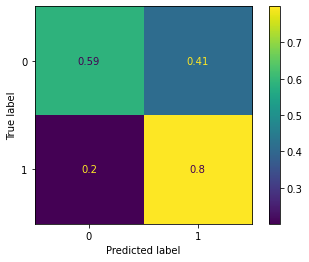

In [395]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(hgbc,f_test,t_test,normalize='true')
plt.show()

#### **FEATURE SELECTION**

##### **USING SELECTKBEST**


In [396]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [426]:
# Applying SelectKBest class to extract top 50 best features
BestFeatures = SelectKBest(score_func =chi2, k = 20)

# Training to find best features
fit = BestFeatures.fit(feature,target)

#saving in the dataframe 
Scores = pd.DataFrame(fit.scores_)
Columns = pd.DataFrame(feature.columns)

# Concatting two dataframes for better visualization
FeatureScores = pd.concat([Columns,Scores], axis = 1)

# naming the dataframe series
FeatureScores.columns = ['Variable', 'Score']

#print 50 best features
#print(FeatureScores.nlargest(30, 'Score'))

In [427]:
#transform the Dataframe with 578 features to  top 50 features

features_sub = BestFeatures.fit_transform(feature, target)
features_sub.shape

(12079, 20)

 **MODELING**

In [428]:
from sklearn.model_selection import train_test_split
rf_train,rf_test,rt_train,rt_test = train_test_split(features_sub,target,stratify=target,test_size=.2,random_state=0)


from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0)
rf_sample, rt_sample = ros.fit_resample(rf_train,rt_train)


In [429]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(rf_sample,rt_sample)

RandomForestClassifier()

In [430]:
rt_pred = rf.predict(rf_test)

In [431]:
from sklearn.metrics import accuracy_score, f1_score

f1 = f1_score(rt_test,rt_pred)
acc = accuracy_score(t_test,t_pred)

print(f'F1_Score: {f1}')
print(f'Accuracy_Score: {acc}')

F1_Score: 0.33462432223082883
Accuracy_Score: 0.7963576158940397


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


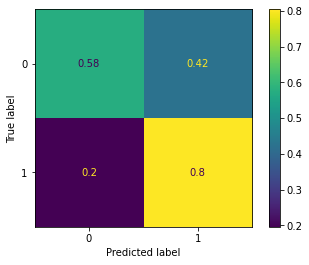

In [425]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,rf_test,rt_test, normalize="true")
plt.show()